# The Classification Predict

Your challenge is building a Machine Learning model that is able to classify, from their tweets whether or not a person believes in climate change. There will be four main categories a tweet can fall under.

There are four distinct Class labels present in the train data. Hence the the problem is a multi-class classification problem. 
  
        Label   Sentiments    Description
         2	   News:         the tweet link to factual news about climate change
         1       Pro:          the tweet supports the belief of man-made climate change
         0	   Neutral:      the tweet neither supports nor refutes the belief of man-made climate change
        -1       Anti:         the tweet does not believe in man-made climate change

### Multi-dimensional Classification

In a multi-dimensional classification problem, the goal is to classify data points into more than two categories based on multiple features or dimensions. Each dimension represents a different attribute or characteristic of the data point.

For example, in a dataset of images of fruits, a multi-dimensional classification problem could involve classifying each image based on multiple features such as color, shape, size, texture, and so on. The goal of the classification task might be to identify whether the image contains an apple, a banana, or an orange based on these features.

Let's explore our data set

In [1]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

In [47]:
import pandas as pd

df= pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [48]:
df = df.drop(['tweetid'], axis = 1)

**Observations:**
* The train dataset contains three columns; one categorical - 'message' and two numerical - 'sentiment and 'tweetid'
* Some tweets contain names of organisations, continents and countries.

### Tweet sentiment analysis

<AxesSubplot:title={'center':'Sentiment distribution'}>

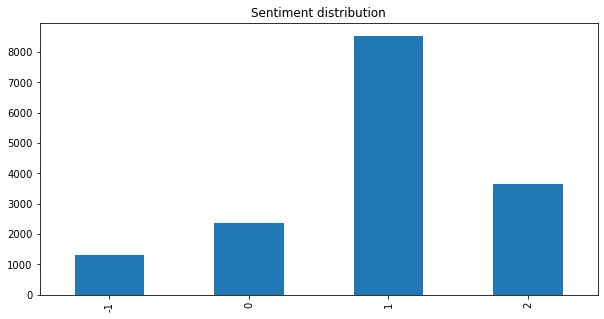

In [49]:
df['sentiment'].value_counts().sort_index().plot(kind = 'bar', title = 'Sentiment distribution', figsize=(10,5))

**Observations:**
* The sum of the tweets relating to news, neutral and anti is less than half of the total tweets.
* The distribution indicates that there is a class imbalance in the train dataset. The effect of this imbalance, if not attended to, is a model which performs very well at categorising samples of a particular category and fails at others. For an instance, a model built on this train data will perform well in categorising tweets which supports man-made climate change (Pro) but performs way lesser at classifying the Anti tweets.
* The training dataset is skewed to the Pro sentiment category indicating a strong support for the belief of man-made climate change. <br><br>

### The Average Tweet

In [50]:
df['message'][2]

'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…'

### Create a function to 'clean' the text

In [53]:
import re

def clean_text(text):
    text = re.sub('[\d-]', '', text) #remove any numbers
    text = re.sub(r'RT', '', text) #remove the retweets
    text = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', r'http', text) #remove the url and replace with http
    return text

In [54]:
df['message'] = df['message'].apply(clean_text)

In [55]:
df['message'][2]

' @RawStory: Researchers say we have three years to act on climate change before it’s too late http http…'

### Tokenize, Lemmatize, Stopwords

In [56]:
import nltk
tokenizer = nltk.RegexpTokenizer(r"\w+")
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')


In [57]:
def message_to_token_list(s):
    tokens = tokenizer.tokenize(s)
    lower_cased_tokens = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lower_cased_tokens]
    useful_tokens = [t for t in lemmatized_tokens if t not in stopwords]
    
    return useful_tokens

In [58]:
message_to_token_list(df['message'][2])

['rawstory',
 'researcher',
 'say',
 'three',
 'year',
 'act',
 'climate',
 'change',
 'late',
 'http',
 'http']

### Apply to whole data frame

In [59]:
df['message'] = df['message'].apply(message_to_token_list)
df['message']= df['message'].apply(lambda x: " ".join(x))


df.head()

,sentiment,message
0,1,polyscimajor epa chief think carbon dioxide ma...
1,1,like lack evidence anthropogenic global warming
2,2,rawstory researcher say three year act climate...
3,1,todayinmaker wired wa pivotal year war climate...
4,1,soynoviodetodas racist sexist climate change d...


### Apply everything to the test data set as well!

In [60]:
df_test['message'] = df_test['message'].apply(clean_text)
df_test['message'] = df_test['message'].apply(message_to_token_list)
df_test['message'] = df_test['message'].apply(lambda x: " ".join(x))

### Vextorization

Vectorization in classification refers to the representation of textual or categorical data as numerical vectors. This is necessary because most classification algorithms cannot process raw data in its original form. Instead, the data must be transformed into a numerical format. Vectorization can be achieved using techniques like one-hot encoding, bag of words, and word embeddings. This process allows algorithms to learn patterns in the data and make predictions about new examples.


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_data(train, test):
    vectorizer = TfidfVectorizer()
    train_data = vectorizer.fit_transform(train)
    test_data = vectorizer.transform(test)
    return train_data, test_data, vectorizer

In [62]:
train_data, test_data, vectorizer = vectorize_data(df['message'], df_test['message'])
feature_names = vectorizer.get_feature_names_out()
for name in feature_names:
    print(name)

______
__branman
__lyly
__stellaaaar
_aglh
_alexhirsch
_america
_andrew_griffin
_anthonyburch
_anunnery
_aye_its_grace
_babykhai
_benjvmins_
_blank
_cjwade
_com
_cudder
_donaldson
_drew_mccoy_
_eleanorwebster
_emawee_
_isabella_c__
_madisonwalsh_
_makada_
_metafizik
_mine_view
_mryezzir
_niallmccarthy
_ohmeohmaya
_ortz
_oscience
_richardblack
_ryanburnett
_rysosceles
_s_clark
_sanctified
_seanohue
_shenanagins
_spiritcircle_
_stephenhoward
_summerstanton
_tempo
_tylermaine
_u_r_n
_unionistparty
_wintergirl
_xninox_
_yellowcxrd
_zeets
a_liberty_rebel
a_real_msmith
aaa
aaaaaaaaaaa
aaaaaand
aaaaand
aaaand
aag
aalicesayss
aan
aapgujarat
aapinnews
aapnews
aapsyc
aaronbastani
aaronwherry
aashi_
aatechnology_in
ab
ab_noble
abaixoassinado
abandon
abandoned
abandoning
abbot
abbott
abbyhoward
abbymartin
abc
abcchicago
abcdesposito
abcnews
abcnewsmelb
abcpolitics
abcthedrum
abcworldnews
abcã
abdah
abdulszn
abdwj
aberdeenshire
aberration
aberuni
aberuninews
abfalecbaldwin
abfortisetliber
abide
abi

broadly
broadside
brobert
broke
broken
brokensystem
bronnie_broom
brontyman
bronzehammer
brooke_babineau
brookefoxnews
brookejarvis
brookewmckeever
brookings
brookingsinst
brooklynseipel
brooklynspoke
brooks_robã
brookskaiser
broomfondel
bros
brosukeh
brother
brought
broughtã
brown
brown_
brownbarrie
browne
brrrr
bruce
bruce_schlink
bruceanderson
brucebartlett
brucehawker
brucel
brucezobel
bruciebabe
brueggemann
bruh
bruneski
brunnkiaer
brunocrussol
brunt
brussels
brutal
brutality
brxwncanadian
bryan
bryanjfischer
bryanrwalsh
bryton
bsf
bsnlcorporate
bsonblast
bstein
bsw
bswinneyscout
bthmrsh
btlvid
btob
bts
btschief
btsthelegends
btw
btwn
bu
bubble
buccisilvio
buck
bucket
bucking
buckyfuller
buckyisotope
buddhasprodigy
buddhist
buddy
budg
budget
budgeteer
budgeting
buenos
buff
buffoon
buffthebill
bug
bug_gwen
bugger
bugwannostra
buhari
build
builder
builderbob
building
buildup
built
builã
bukan
buku
bulb
bull
bulldoze
bulldozes
bullet
bullied
bullish
bullpenning
bullsh
bullshit
bullsh

demonstrate
demonstrated
demonstrating
demonstrator
dems
den
dena
denalism
dengan
deni
denial
denialism
denialist
denialists
deniars
deniaã
denie
denied
denier
denierinchief
denies
deniesã
denigrating
denis
denisleetham
denisnaughten
denkyuumedia
denlesks
denmark
dennett
dennisdmz
dennisprager
denounce
dense
density
dent
denver
denverclimatemarch
deny
denying
dep
department
depend
dependence
dependent
depending
depends
depicts
depletion
deplorable
deplorableegg
deplorableman
deplorablerodent
deplorables
deplores
deploys
deport
deportation
depose
deposit
depot
depressed
depressing
depressingly
depression
deprioritize
dept
deptartment
depth
deptofdefense
deputy
der
derail
deranged
derds
deregulating
deregulatory
derekahunter
derides
derivati
derivative
derivativeshort
dermotoz
derorcurrency
derrickg
derrickokeefe
descartian
descarts
descend
descended
descends
deschu
describe
described
describes
describing
description
deseretnews
desert
desertification
deserve
deserved
deserves
design
des

futurism
futurist
futurology
futuã
fvckrvcism
fw
fwapism
fwiw
fwm
fxj
fyi
fyndaa
fzahmed
fã
g_escribano
g_pijanowski
ga
gaabytobar
gabaker
gabbyroshelli
gabrielgrims
gabriellahope_
gabriellechan
gabyendingstory
gadsaad
gadyepstein
gaf
gaffed
gag
gaga
gagasklaine
gagging
gagtweets
gai
gaia
gaialovesme
gaid
gail_bean
gailnrobinson
gain
gaindivisible
gaining
gajapolicy
galaxy
galetstrong
galivestock
galka_max
gallegosr
gallingly
gallon
galloping
gallucci
gallup
gallupanalytics
galvanize
galveston
game
gamedev
gameofthrones
gamesofthrones
gandhi
gangster
gap
gapframeweek
gaping
gapol
gara
garage
garbage
gardcorejose
garden
garigalanj
garossino
garton
gartrelllinda
gary
garyjanetti
garyjoh
garylineker
garyraybetz
garywolfman
gas
gascon
gasflaring
gasket
gasp
gaspurves
gaston
gate
gatewaypundit
gather
gathered
gathering
gato_gator
gatorau
gatork
gauge
gaughansurfing
gautankwadis
gave
gavin
gavinbade
gavinnewsom
gavinpolone
gaviscon
gay
gayhating
gaypatriot
gayriot
gaza
gazette
gb
gbcsa
gbfis

jayhawksfan
jayhesl
jayjaycafe
jaykraft
jaymontanaa
jayne_thom
jazeera
jazmeigi
jbendery
jbhtd
jblowhard
jboogie
jbwredsox
jc
jcdrex
jchr
jd
jdadams
jdisblack
je
jealous
jean
jeanettejing
jeannieg
jebsanford
jedediahbila
jedrlee
jeep
jeeveswilliams
jeez
jeff
jeff__benjamin
jeffbezos
jeffdsachs
jeffe
jeffersonobama
jeffmcmahon_chi
jeffmerkley
jeffmosier
jeffpearlman
jeffreyatucker
jeffreyguterman
jeffreyhann
jeffreykla
jeffsessions
jeffswarens
jefurticella
jellybeatles
jembloomfield
jen_george
jenditchburn
jendlouhyhc
jeniferstevens
jenkirkman
jenlucpiquant
jenniferjokes
jenniferludden
jenniferwishon
jennjacques
jennmperron
jenns
jenny
jennyhottle
jennymarienau
jensenpnj
jeopardize
jeopardizing
jepomfret
jeramytackett
jeremy
jeremynewberger
jericho
jermny
jerome_corsi
jerry
jerrybrowngov
jerrysartarama
jersey
jerusalem_post
jess_shankleman
jesscapo
jesse
jesse_hirsch
jesselehrich
jessesingal
jessicahuseman
jessicakinneyy
jessiejaneduff
jessokfine
jesuit
jesus
jesusguerreroh
jesusofnaz
j

mimijungking
mimizelman
mims
mimsyyamaguchi
min
min_leblanc
minaj
minamaya
mince
mind
mind_phallus
minded
mindful
mindless
mindsconsole
mindset
mindthet
mine
miner
mineral
minford
minhazmerchant
minhkular
minimadden
minimal
minimize
minimum
mining
minion
miniscule
minister
ministerial
ministri
ministry
minnesota
minor
minoritiesã
minority
minute
minutelong
minutephysics
mirabelli
miracle
miranda
mirasorvino
miriamcosic
miriamisa
mirotic
mirror
misandrism
miserable
misery
misfitmarceline
mishacollins
mishakeet
mishandled
misinformatio
misinformation
misinformed
miskonius
mislead
misleading
misled
mismatch
misogynist
misogynistic
misogyny
misrepresenting
miss
missagnep
missearth
missearth_sa
missed
misselliemae
missemerkenny
missing
missio
mission
missiwimberly
missles
misslilysummers
misslizzynj
missltoe
missmayn
missmollymoore
misssadiev
misstep
missycomm
mista
mistake
mistercarter
mistercs
misterrudeman
mistresstitania
mit
mitamjensen
mitch
mitchellmoffit
mitchellreports
mitchellvii
m

practically
practice
pradeepk
praeteritio
prageru
pragmatic
pragmatist
prairie
praise
praising
prajjwalpanday
pranita
prank
prash
prashantrao
pratyush
praveenswami
pray
prayer
prayfortheplanet
praying
pre
preach
preaches
preaching
preachy
precaution
precautionary
preceding
precious
precipitation
precise
precisely
pred
predator
predetermined
predicament
predict
predictable
predicted
predicting
prediction
predicts
predominant
predominantly
preening
preety
prefer
preferred
prehistoric
prejudice
premature
prematurely
premier
premier_silver
premierbradwall
premise
preorder
prep
prepare
prepared
preparedness
prepares
preparing
preponderance
prepped
prepping
prerequisite
pres
preselect
presence
present
presentation
presenter
preservation
preserve
preserving
presi
presidency
president
presidentdiary
presidentelect
presidentelecttrump
presidentelectã
presidential
presidentke
presidentthe
presidenttrump
presldentbannon
press
pressbriefing
presser
pressing
pressprogress
presssec
pressure
pressure

sicker
siddarthpaim
side
sidebar
sideeffects
sidestepped
sidesã
sidkdp
sido
sidrurana
sids
siege
siemensplm_uk
siepr
sierra
sierraclub
sierraclubwi
sierrarise
sifrlna
sigh
sightedness
sightline
sign
signal
signatory
signature
signed
significant
significantly
signing
signordal
signpost
siguro
sikanderfayyaz
silence
silenced
silencing
silencingthetruth
silent
silently
silicon
silly
sillyquestionsiwantanswered
silver
silveradie
silverlininggs
sim
simeonst
similar
simms
simnhess
simon
simon_gardner
simon_reeve
simonbankshb
simonbullock
simoncoveney
simondonner
simonhedlin
simonwest
simonworrall
simple
simpleminded
simplicity
simply
simulate
simulates
simulating
simulation
simultaneously
sin
sinamonnroii
sinc
sincdavidson
since
sincere
sincerely
sing
singapore
singh
singing
single
singlefamily
singlehandedly
singleissue
sings
sinister
sink
sinkhole
sinking
sinner
sinow
siotag
sipetethamel
sir
sir_david_king
sirbseb
siricerasi
sirjoka
sirkeyblade
sirthomaswynne
sirwilfreddeath
sister
sisyphu

undertaking
underwater
underway
undeã
undo
undoing
undone
undoubtedly
undp
undp_pakistan
undpasiapac
undrstnd
undzwanzignet
undã
uneducated
unemployment
unep
unequal
unequivocal
unesco
unescoihe
unescoã
unethical
unexpected
unexpectedly
unf
unfair
unfamiliarmia
unfao
unfavorable
unfccc
unfcccã
unfit
unfitness
unfolded
unfolding
unfollow
unforeseen
unfortunate
unfortunately
unfoundation
ungaggedepa
ungeneva
ungood
ungtb
unhabitat
unhabitatyouth
unhapped
unhappy
unholy
unhumanrights
uni
unicef
unicefsnowflake
unicorn
unicorncovfefe
unicornsarereal
unified
unifying
unimaginably
unimaginative
unimpeachable
unimportant
uninformed
uninhabitable
unintelligent
uniocracy
uniofoxford
union
unionist
unipersweden
unique
uniquely
unisdr
unison
unisondave
unit
unitar
unite
unitealbertans
uniteblue
united
unitednations
unites
unitesafe
unitewomenorg
unitewomenwv
uniting
unitydays
univ
univ_indonesia
universal
universally
universe
university
universityofnairobi
universityã
univerã
univparis
unknown
un

### Split the Training Data

In [63]:
from sklearn.model_selection import train_test_split
y = df[['sentiment']]
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=42)

### Building our model

The <a href="https://www.upgrad.com/blog/random-forest-classifier/">Random Forest Classifier</a> is among the most popular classification algorithms. It is a supervised learning algorithm which can be used for regression and classification problems. The choice of trying this model includes its significance in terms of accuracy than most of the non-linear classifiers. It is also very robust because it uses multiple decision trees to arrive at its result. The minimum accuracy benchmark for this project is 0.7.

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

tree_model = RandomForestClassifier(max_depth = 25, random_state=10)
tree_model.fit(X_train, y_train)
predictions = tree_model.predict(X_test)
print(classification_report(y_test, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       1.00      0.02      0.04       278
      1: Pro       1.00      0.03      0.06       425
  0: Neutral       0.58      1.00      0.73      1755
    -1: Anti       0.95      0.16      0.27       706

    accuracy                           0.59      3164
   macro avg       0.88      0.30      0.27      3164
weighted avg       0.75      0.59      0.48      3164



**Outcome**

The Random Forest Classifier model, from the confusion matrix, indicates that the model will generate the correct prediction 59% of the time (accuracy). This is not great, so we should endeavour to improve the model, or use another one entirely. 

### Submitting to Kaggle

The kaggle submission is accessed based on accuracy of the model. Therefore for this task, the selection of model should be based on classification accuracy. From the modeling and evaluation section, the XYZ model has the highest accuracy score. The model should be predicted on the entire training and testing data frame

In [65]:
tree_model = RandomForestClassifier(max_depth = 25, random_state=10)
tree_model.fit(train_data, df['sentiment'])
predictions = tree_model.predict(test_data)

In [66]:
from sklearn.linear_model import RidgeClassifier
final_ridge_model = RidgeClassifier()
final_ridge_model.fit(train_data, df['sentiment'])
predictions = final_ridge_model.predict(test_data)

In [67]:
submission = pd.DataFrame({'tweetid': df_test['tweetid'], 'sentiment':predictions})
submission.to_csv('submission.csv', index=False)

predictions.shape

(10546,)